Machine Learning Model for Calorie Expenditure Prediction Analysis 
=======

In [81]:
#Importing librarys...
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder

In [82]:
#Data Loading....
df = pd.read_excel(r"C:\Users\Dell\Downloads\Calorie Expenditure.xlsx")
df

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189,82,26,101,41.0,150
1,1,female,64,163,60,8,85,39.7,34
2,2,female,51,161,64,7,84,39.8,29
3,3,male,20,192,90,25,105,40.7,140
4,4,female,38,166,61,25,102,40.6,146
...,...,...,...,...,...,...,...,...,...
95104,95104,male,48,165,68,19,98,40.5,103
95105,95105,male,25,180,83,16,102,40.4,78
95106,95106,female,77,161,61,18,104,40.4,132
95107,95107,female,47,168,64,19,99,40.6,109


In [83]:
print(df.head(5000).to_string())

        id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0        0    male   36     189      82        26         101       41.0       150
1        1  female   64     163      60         8          85       39.7        34
2        2  female   51     161      64         7          84       39.8        29
3        3    male   20     192      90        25         105       40.7       140
4        4  female   38     166      61        25         102       40.6       146
5        5  female   26     156      56        19         100       40.5       103
6        6  female   21     172      73         3          81       38.3         9
7        7    male   46     188      94        23         100       40.8       145
8        8  female   33     166      63        25         107       40.5       161
9        9    male   65     185      88        23         104       41.0       185
10      10    male   20     186      89        21          94       40.3        86
11  

Data Exploration and Cleaning
======

In [84]:
#Checking shape
df.shape

(95109, 9)

In [85]:
#took randon record
df.sample(5)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
92999,92999,male,42,183,91,15,91,40.3,68
19858,19858,female,20,155,52,11,89,39.9,47
70281,70281,male,34,181,82,28,107,40.9,176
1091,1091,female,54,169,65,6,89,39.4,28
4005,4005,female,53,168,64,12,105,40.3,74


In [86]:
#Checking the columns in the dataset
df.columns

Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [87]:
#Information about the dataset --> values rows columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95109 entries, 0 to 95108
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          95109 non-null  int64  
 1   Sex         95109 non-null  object 
 2   Age         95109 non-null  int64  
 3   Height      95109 non-null  int64  
 4   Weight      95109 non-null  int64  
 5   Duration    95109 non-null  int64  
 6   Heart_Rate  95109 non-null  int64  
 7   Body_Temp   95109 non-null  float64
 8   Calories    95109 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 6.5+ MB


>**Data Preprocessing**

In [88]:
#Checking if there is any NULL value present in the Dataset
df.isna().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [89]:
#checking is there any duplicates value present in the Dataset---> unique rows
df.duplicated().sum()

0

In [90]:
#Brfore trainning the model We have to Change words to number 
le = LabelEncoder()

In [91]:
le

LabelEncoder()

In [92]:
df.Sex = le.fit_transform(df.Sex)

In [93]:
df

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,1,36,189,82,26,101,41.0,150
1,1,0,64,163,60,8,85,39.7,34
2,2,0,51,161,64,7,84,39.8,29
3,3,1,20,192,90,25,105,40.7,140
4,4,0,38,166,61,25,102,40.6,146
...,...,...,...,...,...,...,...,...,...
95104,95104,1,48,165,68,19,98,40.5,103
95105,95105,1,25,180,83,16,102,40.4,78
95106,95106,0,77,161,61,18,104,40.4,132
95107,95107,0,47,168,64,19,99,40.6,109


OUTLIERS CHECKING and REMOVING
====

>**Age Outliers Check**

In [94]:
df[df['Age']<20]

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories


In [95]:
df[df['Age']>80]

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories


>**Height Outliers Check**

Normal adult human height:

Male: ~160 cm – 190 cm

Female: ~150 cm – 175 cm

Unusual but possible: 120 cm – 220 cm

Outliers:
    < 120 cm (unlikely for adults unless it’s a child dataset) and > 220 cm (extremely rare in humans)

In [96]:
df[df['Height']<137]

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories


In [97]:
df[df['Height']>220]

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
52405,52405,1,47,222,128,29,109,41.3,227
84554,84554,1,45,222,128,8,99,40.5,55


In [98]:
df.loc[df["Height"] >= 220, "Height"] = df["Height"] - 4

In [99]:
df[df['Height']>220]

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories


>**Weight Outliers Check**

Normal Adult Human Weight Ranges

Most adults: 45 kg – 120 kg

Athletes / obese individuals: up to 150–180 kg (rare but possible)

Extremely rare: above 200 kg

Below 40 kg → unusual for adults (could be child data or outlier)

🚨 Outlier Guidelines for Weight

< 40 kg → potential outlier (too low for adults) And > 180–200 kg → potential outlier (extremely high weight)

In [100]:
df[df['Weight']<=40]

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
50273,50273,0,45,153,37,18,96,40.7,98


In [101]:
df.loc[df["Weight"] <=40, "Weight"] = df["Weight"] + 5

In [102]:
df[df['Weight']<=40]

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories


In [103]:
df[df['Weight']>132]

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories


>**Heart Rate Outliers Check**

Normal Exercise Heart Rate Ranges

Resting: 60–100 bpm

Moderate exercise: 95–140 bpm (varies with age)

Vigorous exercise: 140–180 bpm (younger adults can go up to 190–200 bpm)

Absolute rare maximum: ~200–210 bpm

🚨 Outlier Guidelines for Exercise Heart Rate

< 40 bpm → unrealistically low (only elite athletes at rest may have this, not during exercise) And > 200 bpm → very rare, usually abnormal/outlier

In [104]:
df[df['Heart_Rate']<67]
df[df['Heart_Rate']>128]

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories


>**Body Temp Outliers Check**

Normal Body Temperature Ranges During Exercise

Resting core temp: ~36.5°C – 37.5°C

Mild–moderate exercise: 37.5°C – 39.0°C

Heavy exercise: up to ~40.0°C

Danger zone (heat stroke risk): ≥ 40.5°C

🚨 Outlier Guidelines

< 35.0°C → hypothermia zone (unlikely in exercise data) And > 41.0°C → too high, usually unsafe/unrealistic

In [105]:
df[df['Body_Temp']<37]

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories


In [106]:
df[df['Body_Temp']>41]

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
24,24,0,45,184,79,30,108,41.1,187
46,46,0,50,171,64,28,116,41.2,214
48,48,0,45,183,82,25,99,41.1,136
111,111,1,44,182,87,27,111,41.1,200
144,144,1,32,189,94,27,111,41.2,191
...,...,...,...,...,...,...,...,...,...
95004,95004,1,45,188,91,26,111,41.2,206
95014,95014,0,35,155,52,28,103,41.2,170
95032,95032,1,49,187,93,28,104,41.1,192
95077,95077,1,27,182,75,27,122,41.2,210


In [107]:
df.loc[df["Body_Temp"] >= 41, "Body_Temp"] = df["Body_Temp"] - 1

In [108]:
df[df['Body_Temp']>41]

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories


RELATIONSHIP OUTLIERS CHECKING and REMOVING
====

>**DURATION Vs CALORIES**

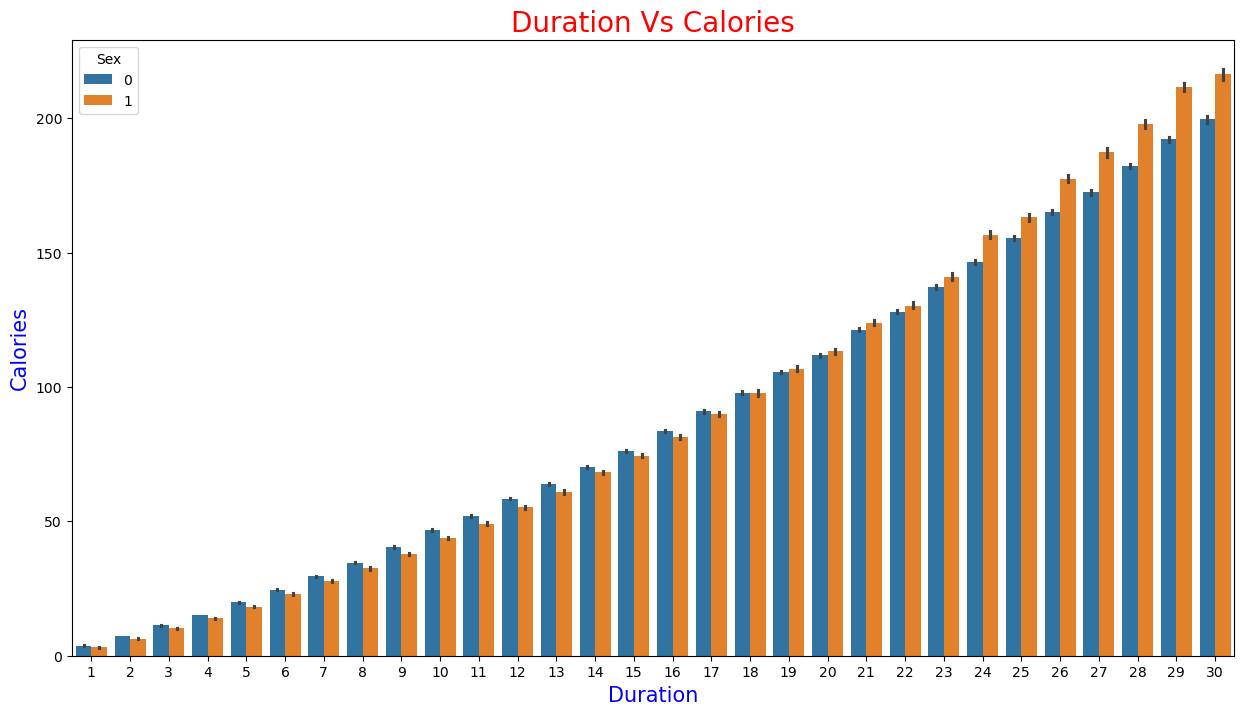

In [109]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x="Duration", y="Calories", hue="Sex")
plt.title('Duration Vs Calories',color='RED',size=20)
plt.xlabel('Duration',color = 'Blue',size=15)
plt.ylabel('Calories',color = 'Blue',size=15)
plt.show()

>**HEART RATE Vs CALORIES**

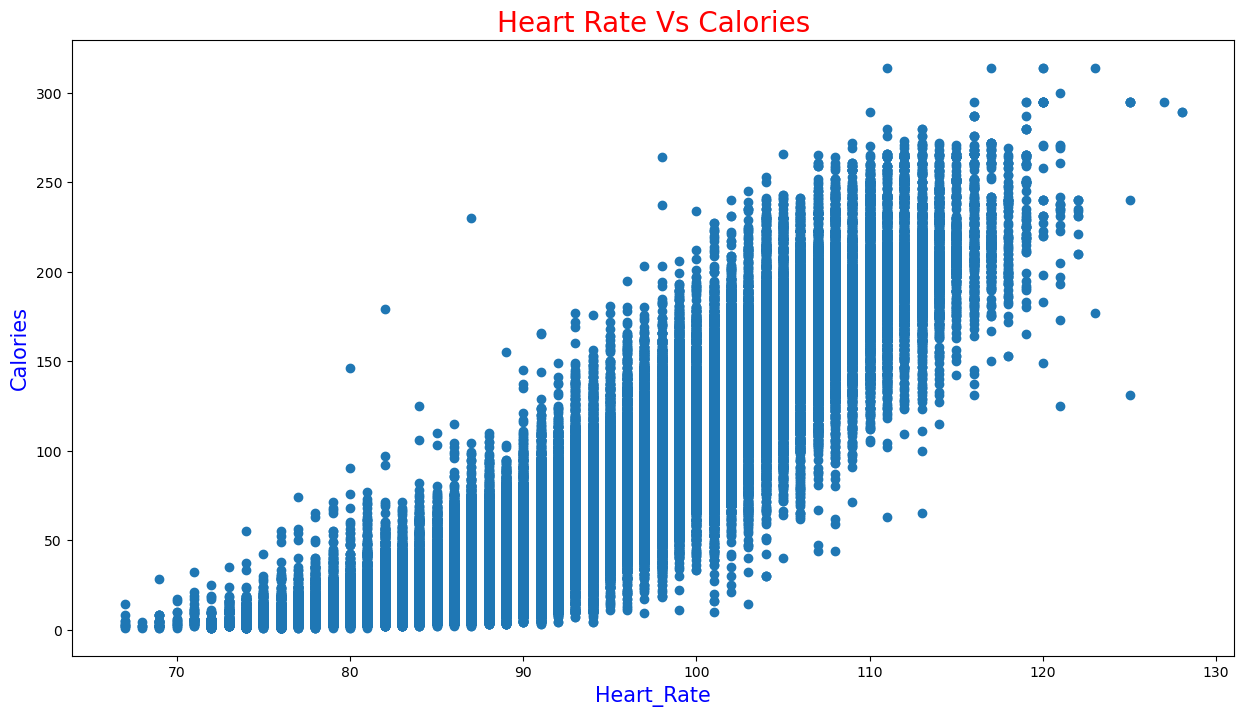

In [110]:
plt.figure(figsize=(15,8))
plt.scatter(df.Heart_Rate,df.Calories)
plt.title('Heart Rate Vs Calories',color='RED',size=20)
plt.xlabel('Heart_Rate',color = 'Blue',size=15)
plt.ylabel('Calories',color = 'Blue',size=15)
plt.show()

>**WEIGHT vs CALORIES**

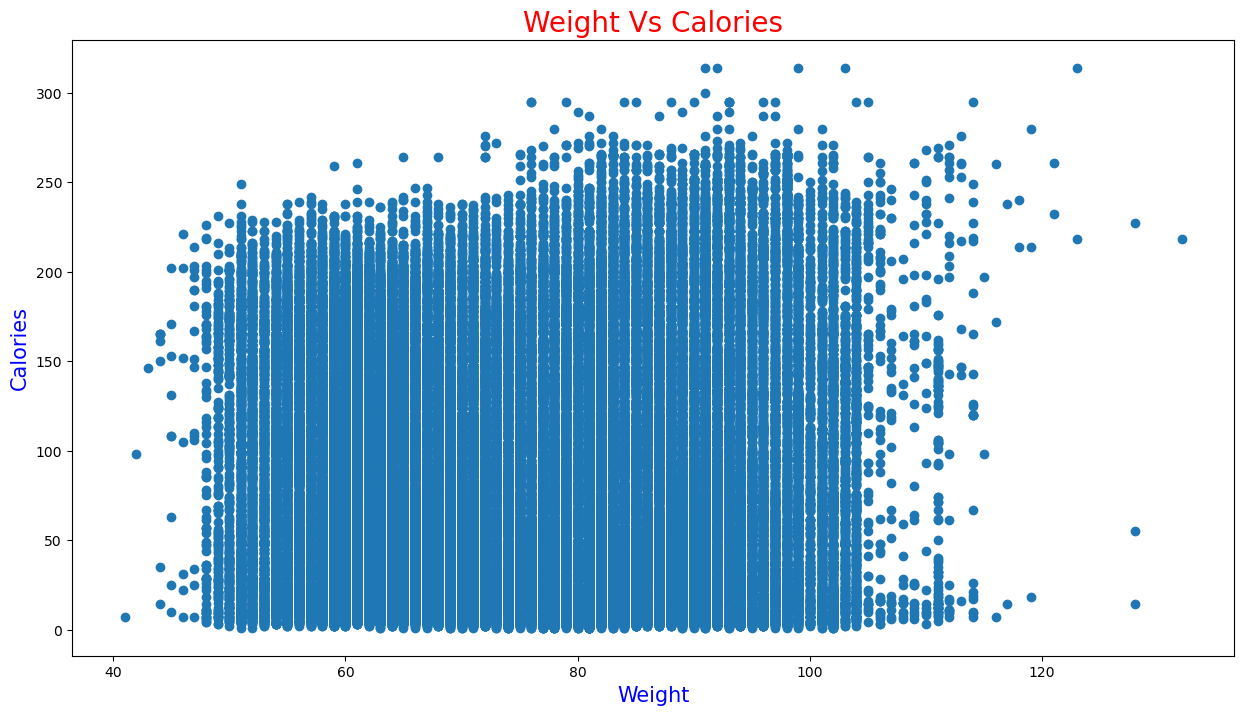

In [111]:
plt.figure(figsize=(15,8))
plt.scatter(df.Weight,df.Calories)
plt.title('Weight Vs Calories',color='RED',size=20)
plt.xlabel('Weight',color = 'Blue',size=15)
plt.ylabel('Calories',color = 'Blue',size=15)
plt.show()

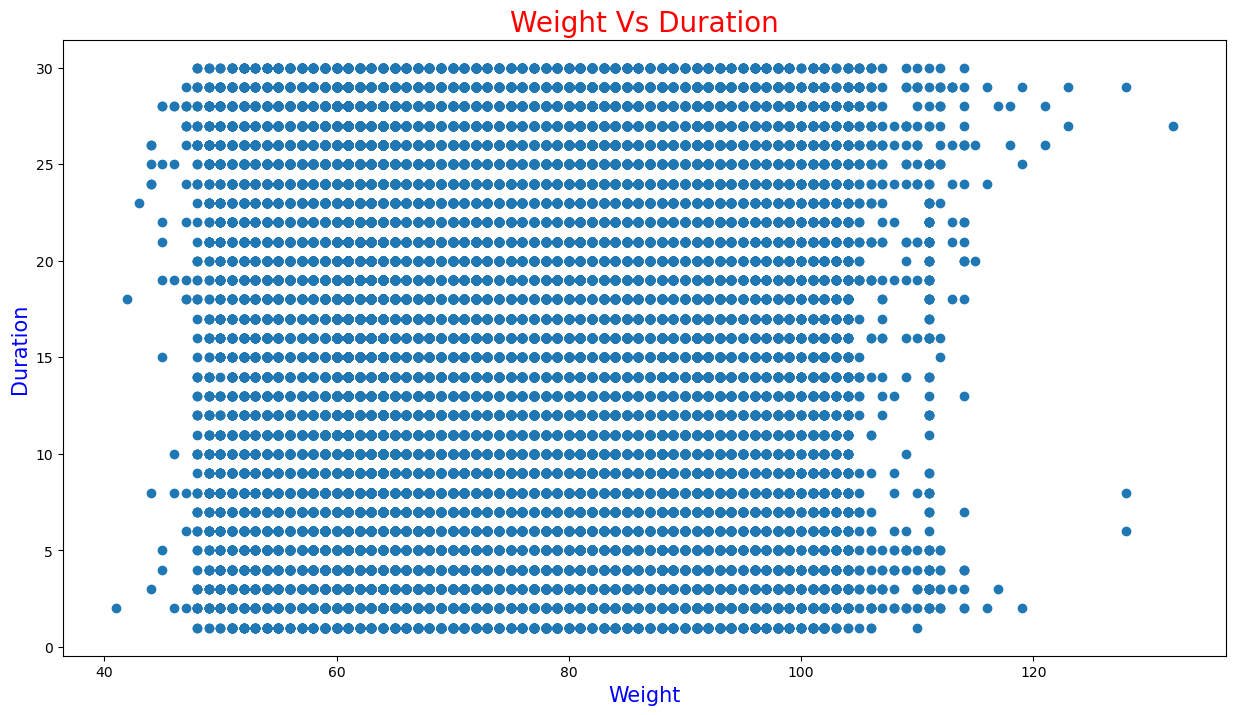

In [112]:
plt.figure(figsize=(15,8))
plt.scatter(df.Weight,df.Duration)
plt.title('Weight Vs Duration',color='RED',size=20)
plt.xlabel('Weight',color = 'Blue',size=15)
plt.ylabel('Duration',color = 'Blue',size=15)
plt.show()

>**BODY TEMP vs CALORIES**

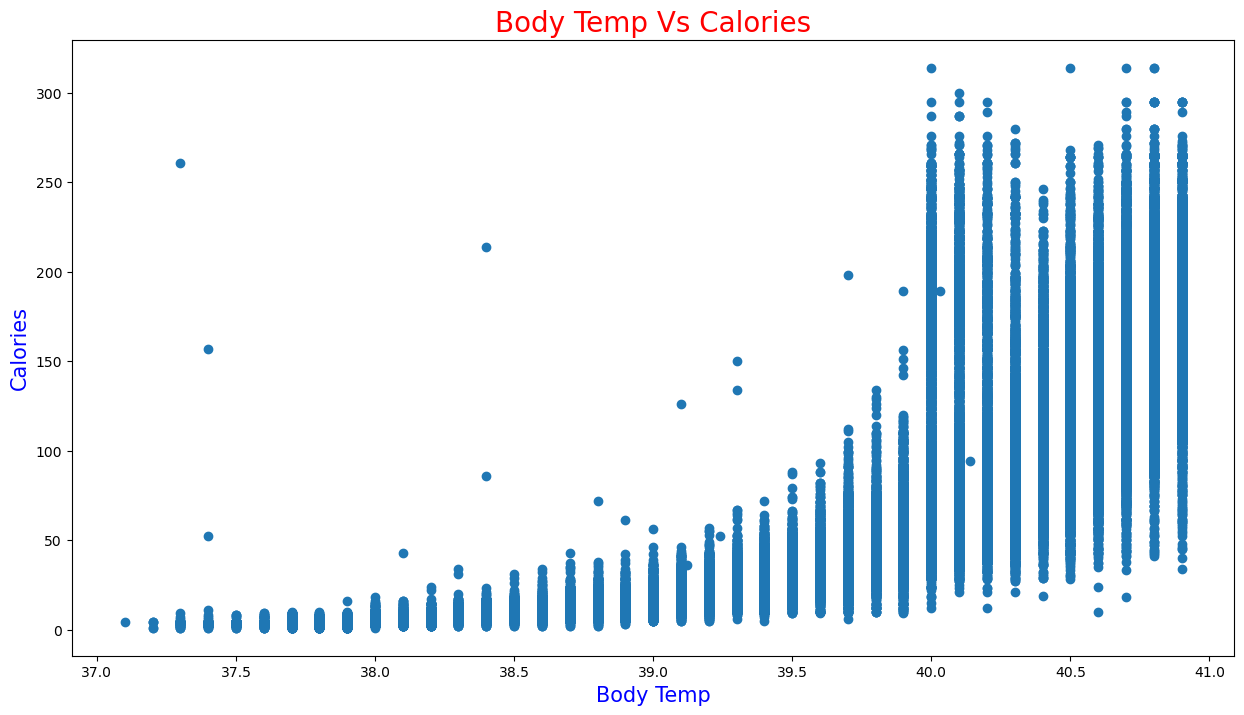

In [113]:
plt.figure(figsize=(15,8))
plt.scatter(df.Body_Temp,df.Calories)
plt.title('Body Temp Vs Calories',color='RED',size=20)
plt.xlabel('Body Temp',color = 'Blue',size=15)
plt.ylabel('Calories',color = 'Blue',size=15)
plt.show()

>**BODY TEMP vs DURATION**

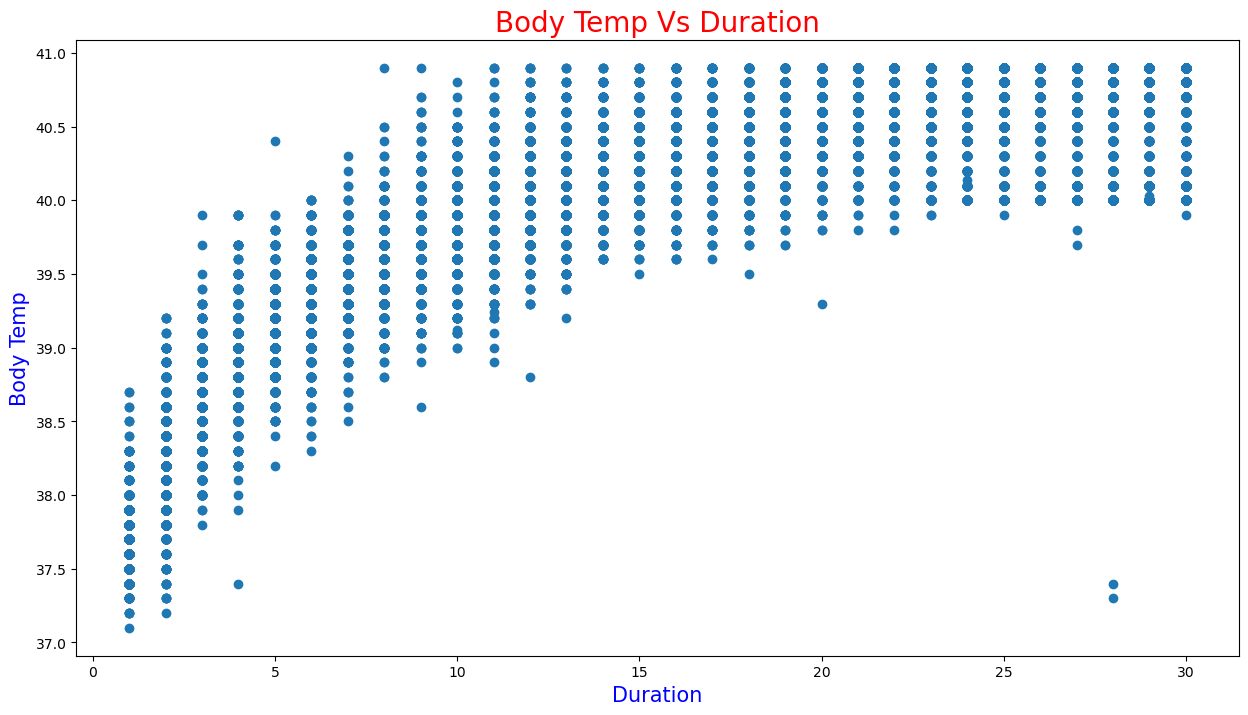

In [114]:
plt.figure(figsize=(15,8))
plt.scatter(df.Duration,df.Body_Temp)
plt.title('Body Temp Vs Duration',color='RED',size=20)
plt.xlabel('Duration',color = 'Blue',size=15)
plt.ylabel('Body Temp',color = 'Blue',size=15)
plt.show()

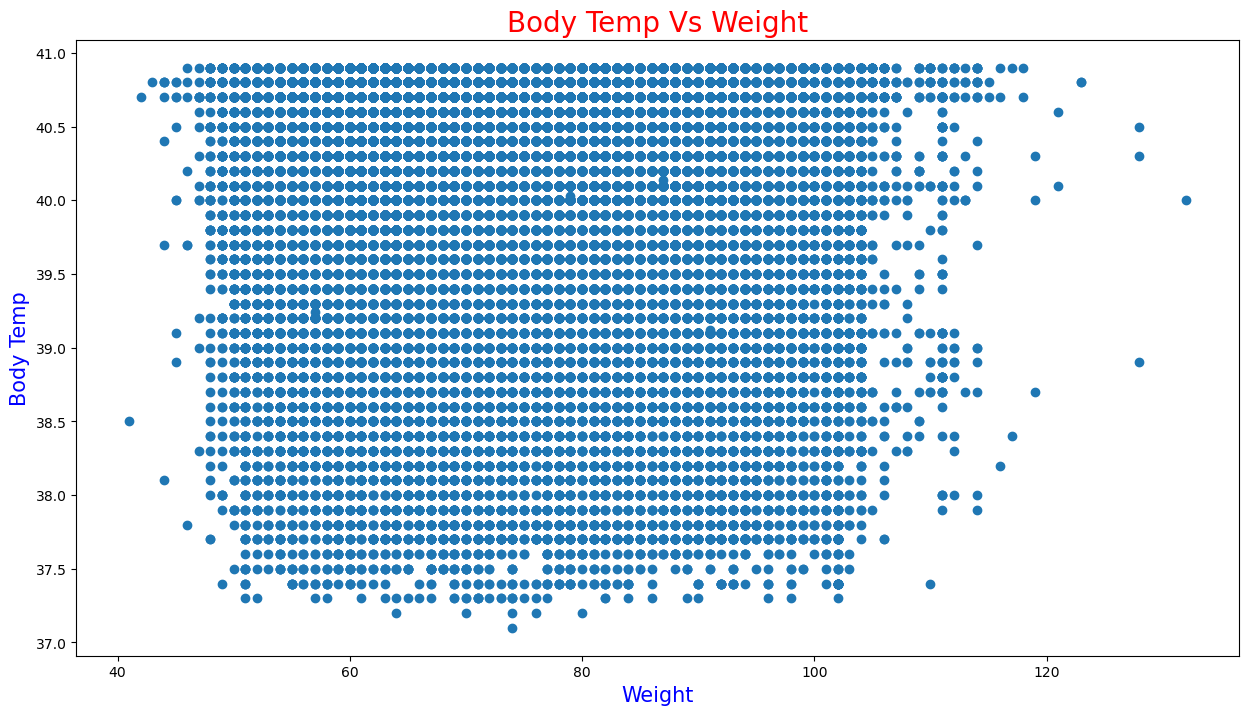

In [115]:
plt.figure(figsize=(15,8))
plt.scatter(df.Weight,df.Body_Temp)
plt.title('Body Temp Vs Weight',color='RED',size=20)
plt.xlabel('Weight',color = 'Blue',size=15)
plt.ylabel('Body Temp',color = 'Blue',size=15)
plt.show()

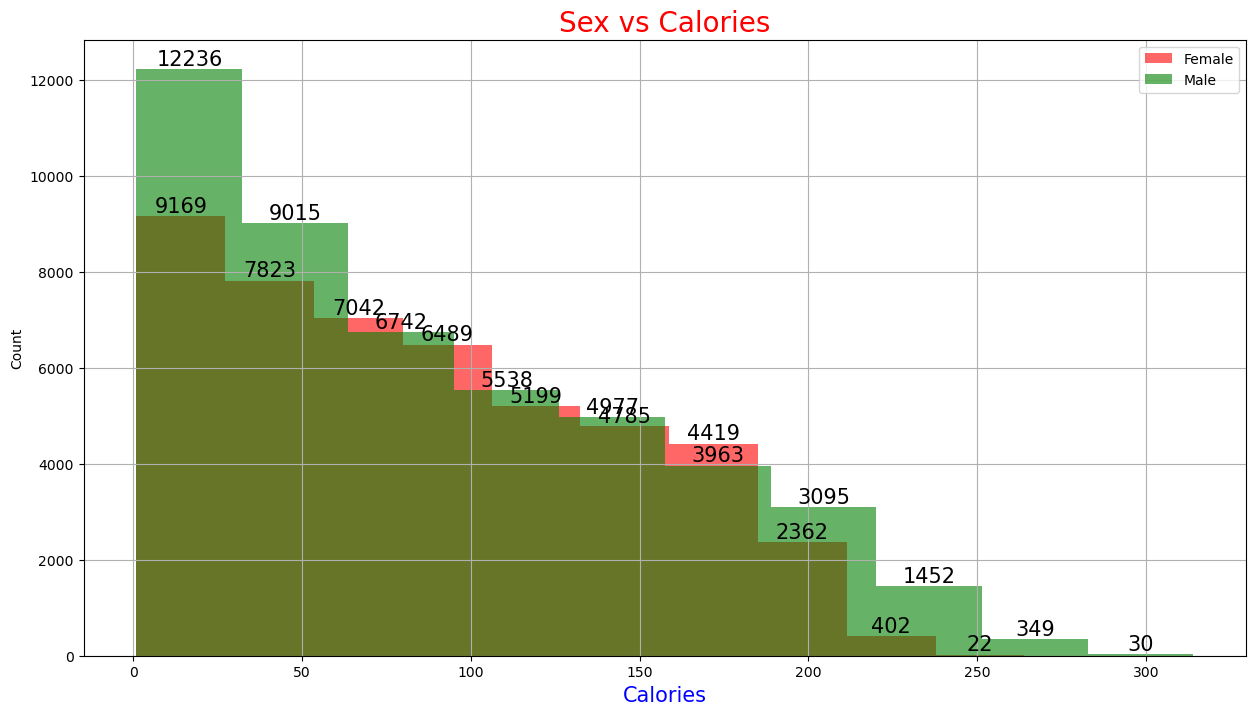

In [116]:
plt.figure(figsize=(15,8))
ax=df[df['Sex'] == 0]['Calories'].hist(alpha=0.6, label='Female', color='red')
ax=df[df['Sex'] == 1]['Calories'].hist(alpha=0.6, label='Male', color='green')
ax.bar_label(ax.containers[0], fontsize=15);
ax.bar_label(ax.containers[1], fontsize=15);
plt.title('Sex vs Calories',color='RED',size=20)
plt.xlabel('Calories',color = 'Blue',size=15)
plt.ylabel('Count')
plt.legend()
plt.show()

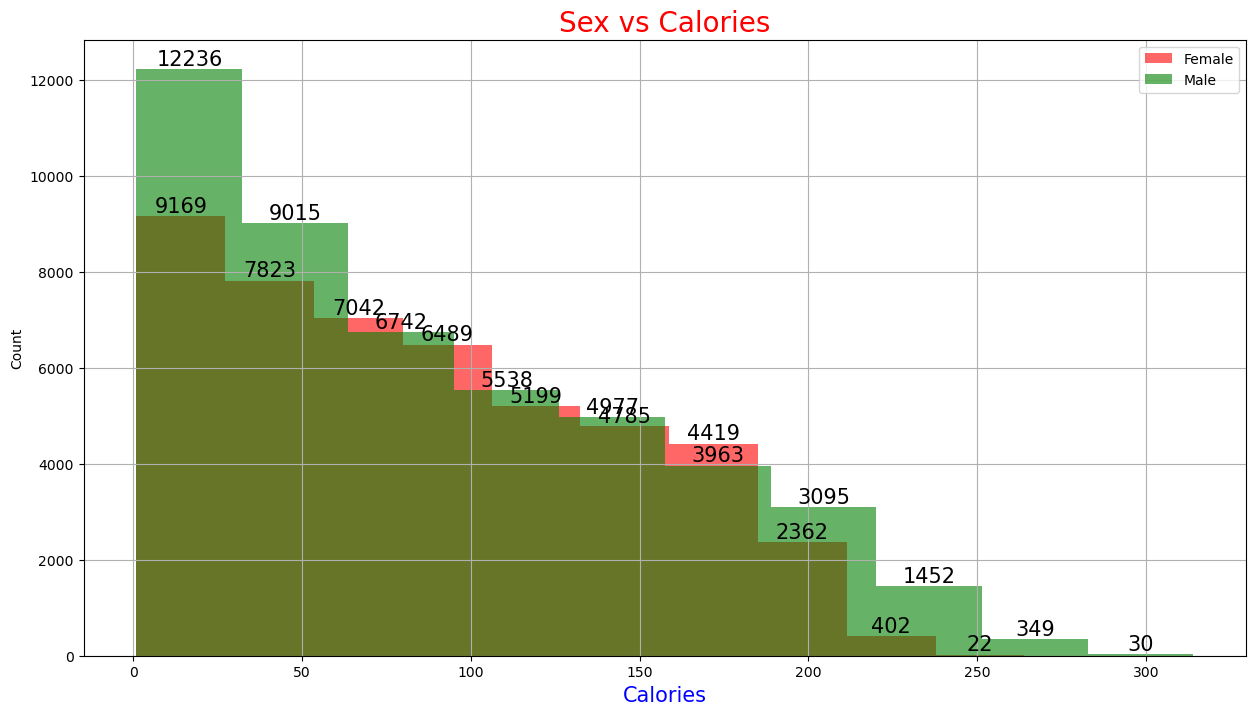

In [117]:
plt.figure(figsize=(15,8))
ax=df[df['Sex'] == 0]['Calories'].hist(alpha=0.6, label='Female', color='red')
ax=df[df['Sex'] == 1]['Calories'].hist(alpha=0.6, label='Male', color='green')
ax.bar_label(ax.containers[0], fontsize=15);
ax.bar_label(ax.containers[1], fontsize=15);
plt.title('Sex vs Calories',color='RED',size=20)
plt.xlabel('Calories',color = 'Blue',size=15)
plt.ylabel('Count')
plt.legend()
plt.show()

Data Splitting for Training and Testing
=======

In [118]:
X = df.drop(['id','Calories'],axis=1)
X

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,36,189,82,26,101,40.0
1,0,64,163,60,8,85,39.7
2,0,51,161,64,7,84,39.8
3,1,20,192,90,25,105,40.7
4,0,38,166,61,25,102,40.6
...,...,...,...,...,...,...,...
95104,1,48,165,68,19,98,40.5
95105,1,25,180,83,16,102,40.4
95106,0,77,161,61,18,104,40.4
95107,0,47,168,64,19,99,40.6


In [119]:
y=df.Calories
y

0        150
1         34
2         29
3        140
4        146
        ... 
95104    103
95105     78
95106    132
95107    109
95108    102
Name: Calories, Length: 95109, dtype: int64

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest Regressor
====

In [122]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [123]:
rf

RandomForestRegressor()

In [124]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [125]:
rf.score(X_train,y_train)

0.9994292998337235

In [126]:
rf.score(X_test,y_test)

0.9958934048344988

In [130]:
y_pred1 = rf.predict(X_test)
y_pred1

array([62.07, 32.91, 92.13, ..., 18.39, 42.3 , 15.73])

In [149]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# y_test: actual values, y_pred1: predicted values
mae1 = mean_absolute_error(y_test, y_pred1)
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse)
r21 = r2_score(y_test, y_pred1)

print("Random Forest Regressor Report:")
print(f"MAE1  : {mae1:.2f}")
print(f"MSE1  : {mse1:.2f}")
print(f"RMSE1 : {rmse1:.2f}")
print(f"R²1   : {r21:.2f}")

Random Forest Regressor Report:
MAE1  : 2.44
MSE1  : 16.01
RMSE1 : 10.79
R²1   : 1.00


Decision Tree Regressor
=======

In [134]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)

In [135]:
dt

DecisionTreeRegressor(random_state=42)

In [136]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [137]:
dt.score(X_test,y_test)

0.99204103925459

In [138]:
dt.score(X_train,y_train)

0.9999976254215215

In [139]:
y_pred2 = dt.predict(X_test)
y_pred2

array([61., 35., 99., ..., 19., 40., 16.])

In [148]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# y_test: actual values, y_pred2: predicted values
mae2 = mean_absolute_error(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse)
r22 = r2_score(y_test, y_pred2)

print("Decision Tree Regressor Report:")
print(f"MAE2  : {mae2:.2f}")
print(f"MSE2  : {mse2:.2f}")
print(f"RMSE2 : {rmse2:.2f}")
print(f"R²2   : {r22:.2f}")


Decision Tree Regressor Report:
MAE2  : 3.44
MSE2  : 31.03
RMSE2 : 10.79
R²2   : 0.99


Linear Regression
=======

In [141]:
from sklearn.linear_model import LinearRegression

In [142]:
lr = LinearRegression()

In [143]:
lr

LinearRegression()

In [144]:
lr.fit(X_train,y_train)

LinearRegression()

In [145]:
lr.score(X_test,y_test)

0.9701488951471237

In [146]:
lr.score(X_train,y_train)

0.9699481222867384

In [147]:
y_pred3 = lr.predict(X_test)
y_pred3

array([71.71023327, 32.18343121, 90.58054027, ..., 27.02539825,
       46.76939439, 14.69724361])

In [150]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# y_test: actual values, y_pred3: predicted values
mae3 = mean_absolute_error(y_test, y_pred3)
mse3 = mean_squared_error(y_test, y_pred3)
rmse3 = np.sqrt(mse)
r23 = r2_score(y_test, y_pred3)

print("Linear Regression Report:")
print(f"MAE3  : {mae3:.2f}")
print(f"MSE3  : {mse3:.2f}")
print(f"RMSE3 : {rmse3:.2f}")
print(f"R²3   : {r23:.2f}")


Linear Regression Report:
MAE3  : 7.85
MSE3  : 116.39
RMSE3 : 10.79
R²3   : 0.97


Scores
======

>**Random Forest Regressor**

In [151]:
print("Random Forest Regressor Report:")
print(f"MAE1  : {mae1:.2f}")
print(f"MSE1  : {mse1:.2f}")
print(f"RMSE1 : {rmse1:.2f}")
print(f"R²1   : {r21:.2f}")

Random Forest Regressor Report:
MAE1  : 2.44
MSE1  : 16.01
RMSE1 : 10.79
R²1   : 1.00


>**Decision Tree Regressor**

In [152]:
print("Decision Tree Regressor Report:")
print(f"MAE2  : {mae2:.2f}")
print(f"MSE2  : {mse2:.2f}")
print(f"RMSE2 : {rmse2:.2f}")
print(f"R²2   : {r22:.2f}")

Decision Tree Regressor Report:
MAE2  : 3.44
MSE2  : 31.03
RMSE2 : 10.79
R²2   : 0.99


>**Linear Regression**

In [153]:
print("Linear Regression Report:")
print(f"MAE3  : {mae3:.2f}")
print(f"MSE3  : {mse3:.2f}")
print(f"RMSE3 : {rmse3:.2f}")
print(f"R²3   : {r23:.2f}")

Linear Regression Report:
MAE3  : 7.85
MSE3  : 116.39
RMSE3 : 10.79
R²3   : 0.97


Making Prediction
=====

In [154]:
print(df.head(50).to_string())

    id  Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0    0    1   36     189      82        26         101       40.0       150
1    1    0   64     163      60         8          85       39.7        34
2    2    0   51     161      64         7          84       39.8        29
3    3    1   20     192      90        25         105       40.7       140
4    4    0   38     166      61        25         102       40.6       146
5    5    0   26     156      56        19         100       40.5       103
6    6    0   21     172      73         3          81       38.3         9
7    7    1   46     188      94        23         100       40.8       145
8    8    0   33     166      63        25         107       40.5       161
9    9    1   65     185      88        23         104       40.0       185
10  10    1   20     186      89        21          94       40.3        86
11  11    0   41     161      63         6          91       39.1        28
12  12    1 

>**Random Forest Regressor**

In [155]:
rf.predict([[1,20,186,89,21,94,40.3]])

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([85.38])

In [158]:
rf.predict([[1,48,165,69,4,79,38.6]])

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([12.21])

>**Decision Tree Regressor**

In [156]:
dt.predict([[1,20,186,89,21,94,40.3]])

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([86.])

In [159]:
dt.predict([[1,48,165,69,4,79,38.6]])

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([13.])

>**Linear Regression**

In [157]:
lr.predict([[1,20,186,89,21,94,40.3]])

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([106.97078321])

In [160]:
lr.predict([[1,48,165,69,4,79,38.6]])

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.71739339])